<a href="https://colab.research.google.com/github/annisapraditha/tugasbesarML/blob/main/MLconvolutional_neural_network(TGS_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #buat loot drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/ml/chest_xray.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/chest_xray'


test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')

test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')

train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

In [4]:
import cv2
import numpy as np

# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [5]:
# Gather data validation
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

Data Preprocessing

In [6]:
# Tampilkan shape dari data train dan data validation
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)

Test Data =  (624, 150, 150, 3)
Test Label =  (624,)
Train Data =  (5232, 150, 150, 3)
Train Label =  (5232,)


In [7]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [57 57 57]
Data setelah di-normalisasi  [0.22352941 0.22352941 0.22352941]


In [8]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", test_label[100:110])

lb = LabelEncoder()
y_test = lb.fit_transform(test_label)
y_train = lb.fit_transform(train_label)

print("Label setelah di-encoder ", y_test[100:110])

Label sebelum di-encoder  ['PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA'
 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


Definisikan Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [10]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [11]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [13]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training Model

In [14]:
H = model.fit(x_test, y_test, batch_size=20, epochs=15, validation_data=(x_train, y_train))

Epoch 1/15
32/32 [==============================] - 35s 144ms/step - loss: 0.6387 - acc: 0.6218 - val_loss: 0.3783 - val_acc: 0.8536
Epoch 2/15
32/32 [==============================] - 3s 90ms/step - loss: 0.3023 - acc: 0.8814 - val_loss: 0.4024 - val_acc: 0.8438
Epoch 3/15
32/32 [==============================] - 3s 90ms/step - loss: 0.2224 - acc: 0.9167 - val_loss: 0.6914 - val_acc: 0.7026
Epoch 4/15
32/32 [==============================] - 3s 88ms/step - loss: 0.2222 - acc: 0.9087 - val_loss: 0.3582 - val_acc: 0.8578
Epoch 5/15
32/32 [==============================] - 3s 89ms/step - loss: 0.1391 - acc: 0.9439 - val_loss: 0.3708 - val_acc: 0.8635
Epoch 6/15
32/32 [==============================] - 3s 89ms/step - loss: 0.1008 - acc: 0.9615 - val_loss: 0.3151 - val_acc: 0.8807
Epoch 7/15
32/32 [==============================] - 3s 89ms/step - loss: 0.1740 - acc: 0.9375 - val_loss: 0.3282 - val_acc: 0.8756
Epoch 8/15
32/32 [==============================] - 3s 89ms/step - loss: 0.0839 -

Evaluasi Model

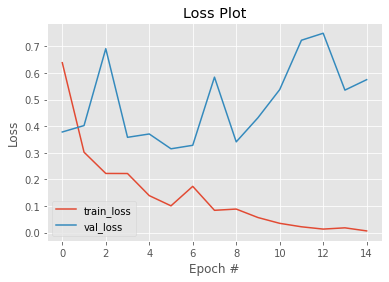

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

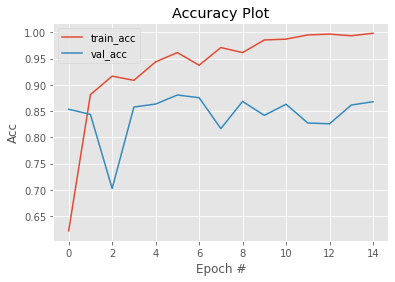

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import classification_report

pred = model.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1349
           1       0.96      0.86      0.91      3883

    accuracy                           0.87      5232
   macro avg       0.82      0.87      0.84      5232
weighted avg       0.89      0.87      0.87      5232

